# 模拟退火算法

seed: -1.0270045597234025
solution: 7.783687127884013


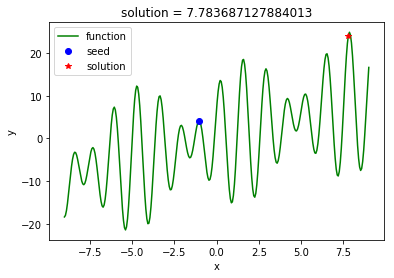

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random


class SA(object):
    def __init__(self, interval, tab='min', T_max=10000, T_min=1, iterMax=1000, rate=.98):
        self.interval = interval  # 给定状态空间
        self.T_max = T_max  # 开始温度
        self.T_min = T_min  # 最小温度
        self.iterMax = iterMax  # 最大迭代次数
        self.rate = rate  # 退火降温速度
        self.x_seed = random.uniform(interval[0], interval[1])  # 解空间内的种子
        self.tab = tab.strip()  # 求解最大值最小值标签
        self.solve()  # 初始化直接调用solve求解
        self.display()  # 求解后画出图像

    def solve(self):  # 求解方法
        temp = 'deal_' + self.tab  # 根据'max', 'min'来确定是调用'deal_min' 还是 'deal_max'
        if hasattr(self, temp):
            deal = getattr(self, temp)
        else:
            exit('>>>tab标签传参有误："min"|"max"<<<')
        x1 = self.x_seed  # 获取随机种子作为起始点
        T = self.T_max  # 最高温度作为初始温度
        while T >= self.T_min:  # 进行退火算法
            for i in range(self.iterMax):  # 每次降温进行1000次的随机移动
                f1 = self.func(x1)  # 初始函数值
                delta_x = random.random() * 2 - 1  # 每次的增量x
                if self.interval[0] <= x1 + delta_x <= self.interval[1]:  # 将x1 + delta_x规范在定义域内
                    x2 = x1 + delta_x
                else:
                    x2 = x1 - delta_x
                f2 = self.func(x2)  # 获取更新后的x的函数值
                delta_f = f2 - f1  # 函数值差
                x1 = deal(x1, x2, delta_f, T)  # 调用deal_min或者deal_max函数选择是否留下更新后的x
            T *= self.rate  # 温度成比例下降
        self.x_solu = x1  # 获得最终结果

    def func(self, x):  # 函数
        value = x + 10 * np.sin(5*x) + 7 * np.cos(4*x)
        return value

    def p_min(self, delta, T):  # 当取最小值时,状态转移概率
        probability = np.exp(-delta / T)
        return probability

    def p_max(self, delta, T):  # 当取最大值时,状态转移概率
        probability = np.exp(delta/T)
        return probability

    def deal_min(self, x1, x2, delta, T):  # 当取最小值时, 判断取舍x
        if delta < 0:  # 如果转移之后函数值变得更小了
            return x2  # 当然最好
        else:  # 否则以一定概率接受不太好的转移
            p = self.p_min(delta, T)
            if p > random.random():
                return x2
            else:
                return x1

    def deal_max(self, x1, x2, delta, T):  # 当取最大值时, 判断取舍x
        if delta > 0:
            return x2
        else:
            p = self.p_max(delta, T)
            if p > random.random():
                return x2
            else:
                return x1

    def display(self):
        print('seed: {}\nsolution: {}'.format(self.x_seed, self.x_solu))
        plt.figure(figsize=(6, 4))
        x = np.linspace(self.interval[0], self.interval[1], 300)
        y = self.func(x)
        plt.plot(x, y, 'g-', label='function')
        plt.plot(self.x_seed, self.func(self.x_seed), 'bo', label='seed')
        plt.plot(self.x_solu, self.func(self.x_solu), 'r*', label='solution')
        plt.title('solution = {}'.format(self.x_solu))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
        plt.close()


SA([-9, 9], 'max')